#Library

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.6 MB/s eta 0:00:00


In [ ]:
#For EDA
import pandas as pd
import numpy as np
import re
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

#For Pre-Processing
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

import plotly.express as px
import matplotlib.pyplot as plt

import nltk
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from imblearn.over_sampling import SMOTE
from collections import Counter
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import time
from tqdm.auto import tqdm
from gensim.models import FastText

import warnings
warnings.filterwarnings("ignore")


# For Training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, accuracy_score, hamming_loss

import os, re, csv, math, codecs

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


#Import Data

In [ ]:
rekomendasi=pd.read_excel('Data for Multi-Class Text Classification.xlsx')

# ***Data Preprocessing***

##Dummy

In [ ]:
bidang_dummy = pd.get_dummies(rekomendasi['Bidang'])

In [ ]:
data=rekomendasi.join(bidang_dummy)

In [ ]:
rekomendasi.drop(['Bidang'], axis=1, inplace=True)

##***Text Cleaning***

1. Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
def cleaning(data):
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi'].str.replace("\\\\r", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("\\\\n", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("\n", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("\r", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("&amp", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("&gt", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("&lt", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("    ", " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ")
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace('"', '')
    data['Rekomendasi_Parsed_1'] = data['Rekomendasi_Parsed_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")
    return data

In [ ]:
data = cleaning(data)
data['Rekomendasi_Parsed_1'].head()

0    Pembelajaran lebih baik dilaksanakan secara kl...
1    Penetapan jadwal pelatihan dapat lebih mengako...
2    Materi perlu ditambah terutama terkait  BLU da...
3    Perlu disediakan mikrofon untuk pengajar karen...
4    Materi terkait aplikasi lebih diperbanyak prak...
Name: Rekomendasi_Parsed_1, dtype: object

2. Mengubah menjadi *lower case*

In [ ]:
def lowerCase(data):
    data['Rekomendasi_Parsed_2'] = data['Rekomendasi_Parsed_1'].str.lower()
    return data

In [ ]:
data = lowerCase(data)
data['Rekomendasi_Parsed_2'].head()

0    pembelajaran lebih baik dilaksanakan secara kl...
1    penetapan jadwal pelatihan dapat lebih mengako...
2    materi perlu ditambah terutama terkait  blu da...
3    perlu disediakan mikrofon untuk pengajar karen...
4    materi terkait aplikasi lebih diperbanyak prak...
Name: Rekomendasi_Parsed_2, dtype: object

3. Menghapus simbol dan tanda baca

In [ ]:
def removePunct(data):
    data['Rekomendasi_Parsed_3'] = data['Rekomendasi_Parsed_2']
    data['Rekomendasi_Parsed_3'] = data['Rekomendasi_Parsed_3'].str.replace("'s","")
    data['Rekomendasi_Parsed_3'] = data['Rekomendasi_Parsed_3'].str.replace('[^a-zA-Z0-9]+',' ')
    return data

In [ ]:
data = removePunct(data)
data['Rekomendasi_Parsed_3'].head()

0    pembelajaran lebih baik dilaksanakan secara kl...
1    penetapan jadwal pelatihan dapat lebih mengako...
2    materi perlu ditambah terutama terkait blu dan...
3    perlu disediakan mikrofon untuk pengajar karen...
4    materi terkait aplikasi lebih diperbanyak prak...
Name: Rekomendasi_Parsed_3, dtype: object

4. Normalisasi kata

In [ ]:
kamus_normal = pd.read_csv("kamusnormalisasi.csv",encoding='latin-1',header=None,names=["non-standard word","standard word"])
kamus_normal.head()

,non-standard word,standard word
0,27-Jun,dua puluh tujuh juni
1,01curang,01 curang
2,01thechampion,01 the champion
3,02wintheelection,02 win the election
4,Â½ramayana,ramayana


In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [ ]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data['Rekomendasi_Parsed_4'] = data['Rekomendasi_Parsed_3']
    data['Rekomendasi_Parsed_4'] = data['Rekomendasi_Parsed_4'].map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

In [ ]:
data = normalizeData(data, stdword, nonstdword)
data['Rekomendasi_Parsed_4'].head()

0    pembelajaran lebih baik dilaksanakan secara kl...
1    penetapan jadwal pelatihan dapat lebih mengako...
2    materi perlu ditambah terutama terkait blu dan...
3    perlu disediakan mikrofon untuk pengajar karen...
4    materi terkait aplikasi lebih diperbanyak prak...
Name: Rekomendasi_Parsed_4, dtype: object

5. Menghilangkan angka

In [ ]:
def removeNumb(data):
    data['Rekomendasi_Parsed_4'] = data['Rekomendasi_Parsed_4'].str.replace('[^a-zA-Z]+',' ')
    return data

In [ ]:
data = removeNumb(data)
data['Rekomendasi_Parsed_4'].head()

0    pembelajaran lebih baik dilaksanakan secara kl...
1    penetapan jadwal pelatihan dapat lebih mengako...
2    materi perlu ditambah terutama terkait blu dan...
3    perlu disediakan mikrofon untuk pengajar karen...
4    materi terkait aplikasi lebih diperbanyak prak...
Name: Rekomendasi_Parsed_4, dtype: object

In [ ]:
print(data['Rekomendasi_Parsed_4'].loc[35])

terdapat error aplikasi via handphone aplikasi store apple pada saat mengerjakan kuis


6. Menghilangkan kata tidak bermakna (*stopwords*)

In [ ]:
list(stopwords.words('indonesian'))

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
meaningless = pd.read_csv("new_stopword.csv",header=None,names=['stopword'])

stop_words = list(stopwords.words('indonesian')) + list(stopwords.words('english'))

meaningless = meaningless['stopword'].tolist()
meaningless = meaningless + stop_words

In [ ]:
def removeMeaningless(data,meaningless_):
    for word in meaningless_:
        regex_meaningless = r"\b" + word + r"\b"
        data['Rekomendasi_Parsed_4'] = data['Rekomendasi_Parsed_4'].str.replace(regex_meaningless, '')
    return data

In [ ]:
data = removeMeaningless(data,meaningless)
data['Rekomendasi_Parsed_4'].head()

0    pembelajaran   dilaksanakan  klasikal  metode ...
1    penetapan jadwal pelatihan   mengakomodasi keb...
2    materi  ditambah  terkait blu  sakti  pengerja...
3     disediakan mikrofon  pengajar   pengajar kual...
4      materi terkait aplikasi  diperbanyak praktiknya
Name: Rekomendasi_Parsed_4, dtype: object

In [ ]:
print(data['Rekomendasi_Parsed_4'].loc[35])

 error aplikasi via handphone aplikasi store apple    kuis


7. Menghilangkan imbuhan (*stemming*)

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmerID = factory.create_stemmer()

In [ ]:
def stemming(text, stemmer_id):
    text_split = text.split(" ")
    stemmed_list = []
    for i in text_split:
        stem_text1 = stemmer_id.stem(i)
        stemmed_list.append(stem_text1)
    stemmed = ' '.join(map(str,stemmed_list))
    return stemmed

def stemData(data, stemmer_id):
    data['Rekomendasi_Parsed_5'] = data['Rekomendasi_Parsed_4']
    data['Rekomendasi_Parsed_5'] = data['Rekomendasi_Parsed_5'].map(lambda com : stemming(com,stemmer_id))
    return data

In [ ]:
data = stemData(data, stemmerID)
data['Rekomendasi_Parsed_5'].head()

0    ajar   laksana  klasikal  metode pjj  efektif ...
1    tetap jadwal latih   akomodasi butuh  istiraha...
2    materi  tambah  kait blu  sakti  kerja lpj ben...
3     sedia mikrofon  ajar   ajar kualitas audio  b...
4                 materi kait aplikasi  banyak praktik
Name: Rekomendasi_Parsed_5, dtype: object

In [ ]:
print(data['Rekomendasi_Parsed_5'].loc[35])

 error aplikasi via handphone aplikasi store apple    kuis


***Fixing Data***

In [ ]:
def fixData(data, stemming=True, stopword=True):
    if stopword == True:
        data_fix = data.drop(['Rekomendasi_Parsed_1', 'Rekomendasi_Parsed_2','Rekomendasi_Parsed_3','Rekomendasi_Parsed_4'],axis=1)
        data_fix = data_fix.rename(columns={'Rekomendasi_Parsed_5': 'Rekomendasi_Parsed'})
    elif stemming == True:
        data_fix = data.drop(['Rekomendasi_Parsed_1', 'Rekomendasi_Parsed_2','Rekomendasi_Parsed_3','Rekomendasi_Parsed_5'],axis=1)
        data_fix = data_fix.rename(columns={'Rekomendasi_Parsed_4': 'Rekomendasi_Parsed'})
    else:
        data_fix = data.drop(['Rekomendasi_Parsed_1', 'Rekomendasi_Parsed_2','Rekomendasi_Parsed_4', 'Rekomendasi_Parsed_5'],axis=1)
        data_fix = data_fix.rename(columns={'Rekomendasi_Parsed_3': 'Rekomendasi_Parsed'})
    return data_fix

In [ ]:
data = fixData(data,stemming=True,stopword=True)
data.head()

,Rekomendasi,Bidang,Non,PMPS,Penyelenggaraan,Renbang,TU,Rekomendasi_Parsed
0,Pembelajaran lebih baik dilaksanakan secara kl...,Non,1,0,0,0,0,ajar laksana klasikal metode pjj efektif ...
1,Penetapan jadwal pelatihan dapat lebih mengako...,Non,1,0,0,0,0,tetap jadwal latih akomodasi butuh istiraha...
2,Materi perlu ditambah terutama terkait BLU da...,Renbang,0,0,0,1,0,materi tambah kait blu sakti kerja lpj ben...
3,Perlu disediakan mikrofon untuk pengajar karen...,Non,1,0,0,0,0,sedia mikrofon ajar ajar kualitas audio b...
4,Materi terkait aplikasi lebih diperbanyak prak...,Renbang,0,0,0,1,0,materi kait aplikasi banyak praktik


In [ ]:
print(data['Rekomendasi_Parsed'].loc[11])

usul     porsi praktik contoh contoh  konkret best practise      mudah   implementasi  kantor   


**Contoh perbandingan rekomendasi asli dengan hasil *text cleaning***

In [ ]:
print(data['Rekomendasi_Parsed'].loc[35])

 error aplikasi via handphone aplikasi store apple    kuis


In [ ]:
#Rekomendasi asli
print(data['Rekomendasi'].loc[0])

#Rekomendasi hasil pre-processing
print(data['Rekomendasi_Parsed'].loc[0])

Pembelajaran lebih baik dilaksanakan secara klasikal karena metode PJJ tidak efektif disebabkan peserta masih melaksanakan pekerjaan rutin
ajar   laksana  klasikal  metode pjj  efektif sebab serta  laksana kerja rutin


#Word Cloud

Word cloud adalah visualisasi dari kumpulan kata dari berbagai dokumen pada satu dataset. Ukuran kata yang terdapat di dalam word cloud berbagai macam mulai dari kecil hingga besar, semakin besar ukuran suatu kata maka semakin sering kata tersebut muncul di berbagai dokumen.

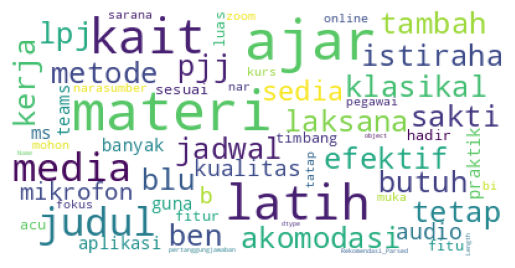

In [ ]:
wordcloud = WordCloud(background_color='white',max_words=200,max_font_size=45,random_state=42).generate(str(data['Rekomendasi_Parsed']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

#Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [ ]:
# Encode labels in column 'Bidang'.
data['Bidang_ID']= label_encoder.fit_transform(data['Bidang'])

#Pembobotan Kata dan Analisis

##BoW

Bag of Words adalah sebuah model yang mempelajari sebuah kosakata dari seluruh dokumen, lalu memodelkan tiap dokumen dengan menghitung jumlah kemunculan setiap kata.

In [ ]:
vectorizer = CountVectorizer(ngram_range=(1, 2))

X2=vectorizer.fit_transform(data['Rekomendasi_Parsed'])

print("Each of the %d complaints is represented by %d features (BoW score of unigrams and bigrams)" %(X2.shape))

Each of the 1563 complaints is represented by 9443 features (BoW score of unigrams and bigrams)


In [ ]:
#Getting the target variable(encoded)
y2=data['Bidang_ID']

In [ ]:
vectorizer.fit_transform(data['Rekomendasi_Parsed']).toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Create a new column 'category_id' with encoded categories
category_id_df = data[['Bidang', 'Bidang_ID']].drop_duplicates()

# Dictionaries for future use
bidang_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Bidang_ID', 'Bidang']].values)

N-Gram


---

N-Gram adalah urutan dari N kata atau huruf yang saling berdekatan pada suatu teks tertentu. Pada NLP, N-Gram memegang peranan penting untuk bisa mendapatkan fitur teks yang melimpah dan efektif. Melalui N-Gram, akan diketahui kata apa saja yang paling banyak muncul pada setiap bidang.

In [ ]:
# Finding the three most correlated terms with each of the Bidang categories
N = 3
for Bidang, Bidang_ID in sorted(bidang_to_id.items()):
  features_chi2 = chi2(X2, y2 == Bidang_ID)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(vectorizer.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Bidang))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Non:
  * Most Correlated Unigrams are: unduh, video, materi
  * Most Correlated Bigrams are: bahan ajar, latih laksana, video unduh

==> PMPS:
  * Most Correlated Unigrams are: tes, kuiz, kuis
  * Most Correlated Bigrams are: kuiz materi, materi kuis, kuis materi

==> Penyelenggaraan:
  * Most Correlated Unigrams are: wa, kelas, panitia
  * Most Correlated Bigrams are: sesuai jadwal, alat makan, grup wa

==> Renbang:
  * Most Correlated Unigrams are: kait, contoh, materi
  * Most Correlated Bigrams are: salah ketik, materi kait, bahan ajar

==> TU:
  * Most Correlated Unigrams are: laundry, makan, kamar
  * Most Correlated Bigrams are: kamar asrama, ruang makan, kamar mandi


###Splitting Dataset

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=0)

###SMOTE

In [ ]:
fig = px.histogram(y2_train)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
print(f'Original dataset shape : {Counter(y2_train)}')

smote = SMOTE(random_state=42)
X2_res, y2_res = smote.fit_resample(X2_train, y2_train)

print(f'Resampled dataset shape {Counter(y2_res)}')

Original dataset shape : Counter({3: 582, 0: 473, 1: 80, 2: 74, 4: 41})
Resampled dataset shape Counter({1: 582, 0: 582, 3: 582, 2: 582, 4: 582})


### SVM

In [ ]:
model2 = SVC()

In [ ]:
param = {'C':[0.01, 0.1, 1, 10, 1000],
          'gamma':[0.0001,0.001,0.01,0.1,1,'scale','auto']}

best_param2 = GridSearchCV(model2, param, refit=True, verbose=3)

In [ ]:
best_param2.fit(X2_res, y2_res)
y2_pred = best_param2.predict(X2_test)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..............C=0.01, gamma=0.0001;, score=0.213 total time=   1.0s
[CV 2/5] END ..............C=0.01, gamma=0.0001;, score=0.213 total time=   1.0s
[CV 3/5] END ..............C=0.01, gamma=0.0001;, score=0.338 total time=   1.3s
[CV 4/5] END ..............C=0.01, gamma=0.0001;, score=0.229 total time=   1.3s
[CV 5/5] END ..............C=0.01, gamma=0.0001;, score=0.234 total time=   1.0s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.211 total time=   1.0s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.247 total time=   1.0s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.333 total time=   1.0s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.227 total time=   1.0s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.234 total time=   1.0s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.206 total time=   1.0s
[CV 2/5] END ................C=0.01, gamma=0.01

In [ ]:
best_param2.best_params_

{'C': 10, 'gamma': 0.1}

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y2_test, y2_pred,
                                    target_names= data['Bidang'].unique()))

				CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

            Non       0.62      0.50      0.55       131
        Renbang       0.53      0.44      0.48        18
Penyelenggaraan       0.32      0.25      0.28        24
           PMPS       0.58      0.72      0.64       138
             TU       0.00      0.00      0.00         2

       accuracy                           0.57       313
      macro avg       0.41      0.38      0.39       313
   weighted avg       0.57      0.57      0.56       313



In [ ]:
accuracy = accuracy_score(y2_test, y2_pred)
precision = precision_score(y2_test, y2_pred, average='micro')
recall = recall_score(y2_test, y2_pred, average='micro')
f1 = f1_score(y2_test, y2_pred, average='micro')
hl = hamming_loss(y2_test, y2_pred)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("Hamming Loss: {:.4f}".format(hl))

Micro-average quality numbers
Accuracy: 0.5687
Precision: 0.5687
Recall: 0.5687
F1-Score: 0.5687
Hamming Loss: 0.4313


##TF-IDF

TF-IDF biasa digunakan ketika kita ingin mengubah data teks menjadi vektor namun dengan memperhatikan apakah sebuah kata tersebut cukup informatif atau tidak. Mudahnya, TF-IDF membuat kata yang sering muncul memiliki nilai yang cenderung kecil, sedangkan untuk kata yang semakin jarang muncul akan memiliki nilai yang cenderung besar. Kata yang sering muncul disebut juga Stopwords biasanya dianggap kurang penting, salah satu contohnya adalah kata hubung (yang, di, akan, dengan, dll).

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
# TF-IDF feature matrix
X1= tfidf_vectorizer.fit_transform(data['Rekomendasi_Parsed'])

In [ ]:
print("Each of the %d complaints is represented by %d features (BoW score of unigrams and bigrams)" %(X1.shape))

Each of the 1563 complaints is represented by 9443 features (BoW score of unigrams and bigrams)


In [ ]:
X1.shape

(1563, 9443)

In [ ]:
tfidf_vectorizer.fit_transform(data['Rekomendasi_Parsed']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Getting the target variable(encoded)
y1=data['Bidang_ID']

In [ ]:
# Create a new column 'category_id' with encoded categories
category_id_df = data[['Bidang', 'Bidang_ID']].drop_duplicates()

# Dictionaries for future use
bidang_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Bidang_ID', 'Bidang']].values)

N-Gram


---

N-Gram adalah urutan dari N kata atau huruf yang saling berdekatan pada suatu teks tertentu. Pada NLP, N-Gram memegang peranan penting untuk bisa mendapatkan fitur teks yang melimpah dan efektif. Melalui N-Gram, akan diketahui kata apa saja yang paling banyak muncul pada setiap bidang.

In [ ]:
# Finding the three most correlated terms with each of the Bidang categories
N = 3
for Bidang, Bidang_ID in sorted(bidang_to_id.items()):
  features_chi2 = chi2(X1, y1 == Bidang_ID)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf_vectorizer.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Bidang))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Non:
  * Most Correlated Unigrams are: video, luring, unduh
  * Most Correlated Bigrams are: laksana luring, latih laksana, video unduh

==> PMPS:
  * Most Correlated Unigrams are: tes, kuiz, kuis
  * Most Correlated Bigrams are: kuis bahan, kuis materi, kuiz materi

==> Penyelenggaraan:
  * Most Correlated Unigrams are: grup, wa, panitia
  * Most Correlated Bigrams are: sesuai jadwal, alat makan, grup wa

==> Renbang:
  * Most Correlated Unigrams are: kuis, unduh, contoh
  * Most Correlated Bigrams are: latih laksana, banyak contoh, video unduh

==> TU:
  * Most Correlated Unigrams are: makan, laundry, kamar
  * Most Correlated Bigrams are: laundry pagi, kamar asrama, kamar mandi


###Splitting Dataset

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,random_state=0)

In [ ]:
print(X1_train.shape)
print(X1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(1250, 9443)
(313, 9443)
(1250,)
(313,)


###SMOTE

In [ ]:
fig = px.histogram(y1_train)
fig.update_xaxes(categoryorder='total descending')
fig.show()

In [ ]:
print(f'Original dataset shape : {Counter(y1_train)}')

smote = SMOTE(random_state=42)
X1_res, y1_res = smote.fit_resample(X1_train, y1_train)

print(f'Resampled dataset shape {Counter(y1_res)}')

Original dataset shape : Counter({3: 582, 0: 473, 1: 80, 2: 74, 4: 41})
Resampled dataset shape Counter({1: 582, 0: 582, 3: 582, 2: 582, 4: 582})


In [ ]:
X1_test.shape

(313, 9443)

In [ ]:
X1_res.shape

(2910, 9443)

###SVM

In [ ]:
model1 = SVC()

In [ ]:
param = {'C':[0.01, 0.1, 1, 10, 1000],
          'gamma':[0.0001,0.001,0.01,0.1,1,'scale','auto']}

best_param = GridSearchCV(model1, param, refit=True, verbose=3)

In [ ]:
best_param.fit(X1_res, y1_res)
y11_pred = best_param.predict(X1_test)

Fitting 5 folds for each of 35 candidates, totalling 175 fits
[CV 1/5] END ..............C=0.01, gamma=0.0001;, score=0.500 total time=   1.3s
[CV 2/5] END ..............C=0.01, gamma=0.0001;, score=0.478 total time=   1.3s
[CV 3/5] END ..............C=0.01, gamma=0.0001;, score=0.514 total time=   1.3s
[CV 4/5] END ..............C=0.01, gamma=0.0001;, score=0.488 total time=   1.3s
[CV 5/5] END ..............C=0.01, gamma=0.0001;, score=0.514 total time=   1.3s
[CV 1/5] END ...............C=0.01, gamma=0.001;, score=0.503 total time=   1.3s
[CV 2/5] END ...............C=0.01, gamma=0.001;, score=0.479 total time=   1.7s
[CV 3/5] END ...............C=0.01, gamma=0.001;, score=0.514 total time=   1.4s
[CV 4/5] END ...............C=0.01, gamma=0.001;, score=0.488 total time=   1.3s
[CV 5/5] END ...............C=0.01, gamma=0.001;, score=0.514 total time=   1.3s
[CV 1/5] END ................C=0.01, gamma=0.01;, score=0.512 total time=   1.3s
[CV 2/5] END ................C=0.01, gamma=0.01

In [ ]:
best_param.best_params_

{'C': 10, 'gamma': 0.1}

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y1_test, y11_pred,
                                    target_names= data['Bidang'].unique()))

				CLASSIFICATIION METRICS

                 precision    recall  f1-score   support

            Non       0.61      0.63      0.62       131
        Renbang       0.91      0.56      0.69        18
Penyelenggaraan       0.88      0.29      0.44        24
           PMPS       0.64      0.73      0.68       138
             TU       0.00      0.00      0.00         2

       accuracy                           0.64       313
      macro avg       0.61      0.44      0.49       313
   weighted avg       0.66      0.64      0.63       313



In [ ]:
accuracy = accuracy_score(y1_test, y11_pred)
precision = precision_score(y1_test, y11_pred, average='micro')
recall = recall_score(y1_test, y11_pred, average='micro')
f1 = f1_score(y1_test, y11_pred, average='micro')
hl = hamming_loss(y1_test, y11_pred)

print("Micro-average quality numbers")
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))
print("Hamming Loss: {:.4f}".format(hl))

Micro-average quality numbers
Accuracy: 0.6390
Precision: 0.6390
Recall: 0.6390
F1-Score: 0.6390
Hamming Loss: 0.3610
